# Tesseract Experiments

In [1]:
import os
import numpy as np
import tensorflow as tf
import sys
import cv2
import re
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

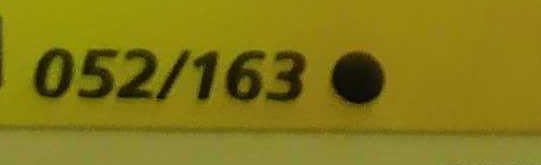

In [2]:
file_dir = os.path.abspath('')+"\\train"
file_path = os.path.join(file_dir, "focused_camera4.jpg")
Image.open(file_path)

In [3]:
cardtext = pytesseract.image_to_string(cv2.resize(cv2.imread(file_path), None, fx=2.5, fy=2.5, interpolation = cv2.INTER_LANCZOS4), config='--psm 11')
print(cardtext)

052/163 @

0



In [4]:
regexReg = '\d{2,3}\/\d{2,3}'
regexPromo = '\W{0,4}\d{2,3}'
re.findall(regexReg,cardtext)[0]

'052/163'

In [5]:
## Multiple Full High Resolution Card

In [6]:
# Config 11: Page Separation Model - Sparse text. Find as much text as possible in no particular order.
# OpenCV Zoom: 2.5x
file_dir = os.path.abspath('')+"\\train\\fullcard"
regexReg = '\d{2,3}\/\d{2,3}'
regexPromo = '\W{2,4}\d{2,3}'

collector_number_only = []
errors = []

# go through folder & perform OCR if file
for filename in os.scandir(file_dir):
    if filename.is_file():
        try:
            collector_number_only.append(re.findall(regexReg,(pytesseract.image_to_string(cv2.resize(cv2.imread(filename.path), None, fx=2.5, fy=2.5, interpolation = cv2.INTER_LANCZOS4), config='--psm 11')))[0])
        except IndexError:
            try:
                collector_number_only.append(re.findall(regexPromo,(pytesseract.image_to_string(cv2.resize(cv2.imread(filename.path), None, fx=2.5, fy=2.5, interpolation = cv2.INTER_LANCZOS4), config='--psm 11')))[0])
            except IndexError:
                collector_number_only.append('')
                errors.append(filename)
    else:
        pass
    print(f'Done: {filename}')

Done: <DirEntry 'bottom10'>
Done: <DirEntry 'corviknight_v.png'>
Done: <DirEntry 'corviknight_vmax.png'>
Done: <DirEntry 'corviknight_vmax_gray.png'>
Done: <DirEntry 'cramorant.png'>
Done: <DirEntry 'golden_octillery.png'>
Done: <DirEntry 'golden_special_energy.png'>
Done: <DirEntry "Professor's_Research.png">
Done: <DirEntry 'rainbow_corviknight_vmax.png'>
Done: <DirEntry 'rainbow_trainer.png'>
Done: <DirEntry 'single_strike_urshifu_vmax.png'>
Done: <DirEntry 'special_energy.png'>
Done: <DirEntry 'trainer.png'>


In [7]:
collector_number_only

['109/163',
 '110/163',
 '110/163',
 '062/202',
 '',
 '',
 '\n\n©202',
 '171/163',
 ') 077',
 '168/163',
 '140/163',
 '124/163']

In [8]:
errors

[<DirEntry 'golden_octillery.png'>, <DirEntry 'golden_special_energy.png'>]

In [9]:
## Multiple: Bottom 10% region of interest High Resolution Card

In [10]:
# Config 11: Page Separation Model - Sparse text. Find as much text as possible in no particular order.
# OpenCV Zoom: 2x
file_dir = os.path.abspath('')+"\\train\\fullcard\\bottom10"
regexReg = '\d{2,3}\/\d{2,3}'
regexPromo = '\W{2,4}\d{2,3}'

collector_number_only = []
errors = []

# go through folder & perform OCR if file
for filename in os.scandir(file_dir):
    if filename.is_file():
        try:
            collector_number_only.append(re.findall(regexReg,(pytesseract.image_to_string(cv2.resize(cv2.imread(filename.path), None, fx=2, fy=2, interpolation = cv2.INTER_LANCZOS4), config='--psm 11')))[0])
        except IndexError:
            try:
                collector_number_only.append(re.findall(regexPromo,(pytesseract.image_to_string(cv2.resize(cv2.imread(filename.path), None, fx=2, fy=2, interpolation = cv2.INTER_LANCZOS4), config='--psm 11')))[0])
            except IndexError:
                collector_number_only.append('')
                errors.append(filename)
    else:
        pass
    print(f'Done: {filename}')

Done: <DirEntry 'corviknight_v.png'>
Done: <DirEntry 'corviknight_vmax.png'>
Done: <DirEntry 'corviknight_vmax_gray.png'>
Done: <DirEntry 'cramorant.png'>
Done: <DirEntry 'golden_octillery.png'>
Done: <DirEntry 'golden_special_energy.png'>
Done: <DirEntry "Professor's_Research.png">
Done: <DirEntry 'rainbow_corviknight_vmax.png'>
Done: <DirEntry 'rainbow_trainer.png'>
Done: <DirEntry 'single_strike_urshifu_vmax.png'>
Done: <DirEntry 'special_energy.png'>
Done: <DirEntry 'trainer.png'>


In [11]:
collector_number_only

['109/163',
 '\n\n©202',
 '110/163',
 '062/202',
 '',
 '183/163',
 '201/202',
 '171/163',
 '077/073',
 '\n\n100',
 '140/163',
 '124/163']

In [12]:
errors

[<DirEntry 'golden_octillery.png'>]

In [13]:
## Multiple: Focused on Collector Number

In [14]:
# Config 6: Page Separation Model - Assume a single uniform block of text
# OpenCV Zoom: 2x
file_dir = os.path.abspath('')+"\\train"
regexReg = '\d{2,3}\/\d{2,3}'
regexPromo = '\W{2,4}\d{2,3}'

collector_number_only = []
errors = []

# go through folder & perform OCR if file
for filename in os.scandir(file_dir):
    if filename.is_file():
        try:
            collector_number_only.append(re.findall(regexReg,(pytesseract.image_to_string(cv2.resize(cv2.imread(filename.path), None, fx=2, fy=2, interpolation = cv2.INTER_LANCZOS4), config='--psm 6')))[0])
        except IndexError:
            try:
                collector_number_only.append(re.findall(regexPromo,(pytesseract.image_to_string(cv2.resize(cv2.imread(filename.path), None, fx=2, fy=2, interpolation = cv2.INTER_LANCZOS4), config='--psm 6')))[0])
            except IndexError:
                collector_number_only.append('')
                errors.append(filename)
    else:
        pass
    print(f'Done: {filename}')

Done: <DirEntry 'camera'>
Done: <DirEntry 'collectornumber1.png'>
Done: <DirEntry 'collectornumber10.png'>
Done: <DirEntry 'collectornumber11.png'>
Done: <DirEntry 'collectornumber2.png'>
Done: <DirEntry 'collectornumber2gray.png'>
Done: <DirEntry 'collectornumber3.png'>
Done: <DirEntry 'collectornumber4.png'>
Done: <DirEntry 'collectornumber5.png'>
Done: <DirEntry 'collectornumber6.png'>
Done: <DirEntry 'collectornumber7.png'>
Done: <DirEntry 'collectornumber8.png'>
Done: <DirEntry 'collectornumber9.png'>
Done: <DirEntry 'focused_camera4.jpg'>
Done: <DirEntry 'fullcard'>


In [15]:
collector_number_only

['109/163',
 '140/163',
 '124/163',
 '110/163',
 '110/163',
 '062/202',
 '178/163',
 '201/202',
 '183/163',
 '171/163',
 '077/073',
 '168/163',
 '052/163']

In [16]:
errors

[]

### Conclusion: Best results come from focused image

Steps to produce focused image:

1) Object Detection - Tensorflow

2) Crop image - OpenCV

3) Create contour - OpenCV

4) Rotate image using contour line vs vertical - OpenCV

5) Crop Image based on contour - OpenCV

6) Region of Interest - Tensorflow teaching & OpenCV

7) Crop Region of Interest - OpenCV

8) Object Detection for Set Symbol/Collector number - Tensorflow

9) Focus on & Crop set symbol/collector number - OpenCV

10) Zoom/Enhance to predetermined size - OpenCV

11) OCR - Tesseract